In [45]:
pip install statsmodels

In [46]:
!pip install statsforecast

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsforecast import StatsForecast
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import warnings

In [48]:
warnings.filterwarnings("ignore")

# Q3 C Python Code

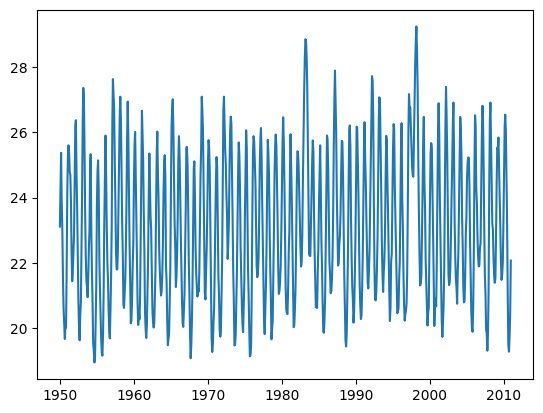

In [49]:
data=pd.read_csv("custom_dataset.csv")
data['ds']=pd.to_datetime(data['ds'],format='%Y-%m-%d')
data.set_index('ds',inplace=True)
time_series = data['y']
plt.plot(data["y"])

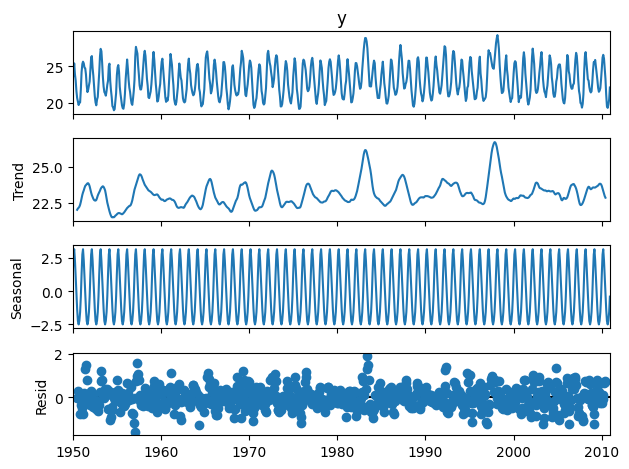

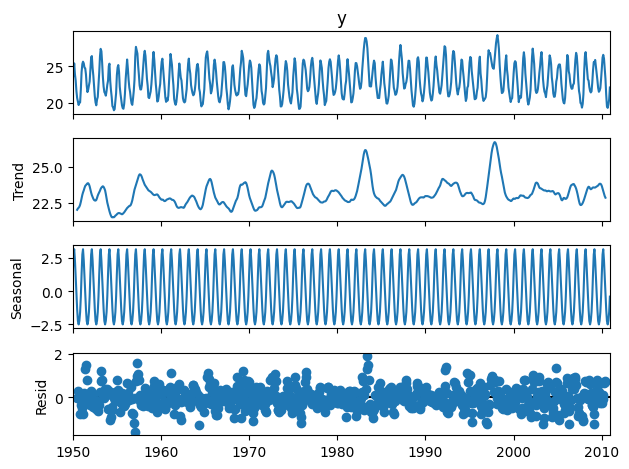

In [50]:
result=seasonal_decompose(time_series,model='additive')
result.plot()

In [51]:
results=pd.DataFrame()
results['trend']=result.trend
results['seasonal'] = result.seasonal
results['residual'] = result.resid
results.dropna(inplace=True)
results.head(20)

,trend,seasonal,residual
ds,,,
1950-07-01,21.998333,-1.347966,-0.020367
1950-08-01,22.088333,-2.239598,0.301264
1950-09-01,22.142917,-2.501605,0.028688
1950-10-01,22.215417,-2.228264,0.042848
1950-11-01,22.351667,-1.570139,-0.761527
1950-12-01,22.555000,-0.411008,-0.343992
1951-01-01,22.819583,1.297486,0.072931
1951-02-01,23.044583,2.750777,-0.515361
1951-03-01,23.208750,3.147173,-0.755923


### Multiplicative

In [52]:
result_mul=seasonal_decompose(time_series,model='multiplicative')

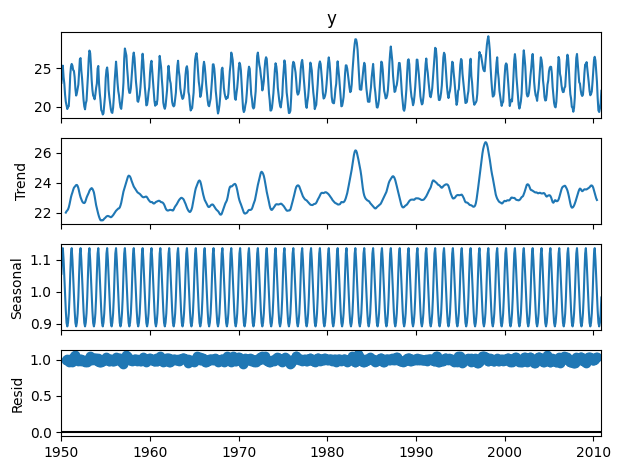

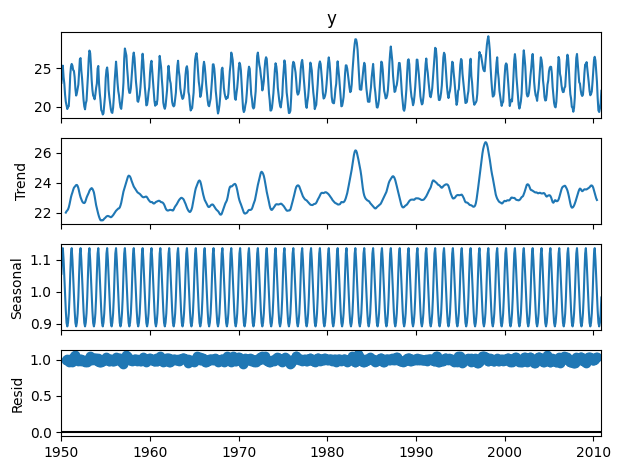

In [53]:
result_mul.plot()

In [54]:
# creating a pandas DF to store the series components.
results_mul= pd.DataFrame()
results_mul['trend']=result_mul.trend
results_mul['seasonality']=result_mul.seasonal
results_mul['residual']=result_mul.resid
results_mul.dropna(inplace=True)
results_mul.head(20)

,trend,seasonality,residual
ds,,,
1950-07-01,21.998333,0.941372,0.996203
1950-08-01,22.088333,0.902875,1.010379
1950-09-01,22.142917,0.891706,0.996203
1950-10-01,22.215417,0.903470,0.997960
1950-11-01,22.351667,0.931989,0.961045
1950-12-01,22.555000,0.982209,0.984034
1951-01-01,22.819583,1.056485,1.003378
1951-02-01,23.044583,1.119558,0.979855
1951-03-01,23.208750,1.136587,0.970477


# Q4 Calculate the results using in-built methods for the 4 simple approaches, using Nixtla framework and also calculate the MAPE and MAE values

In [55]:
from statsforecast.models import HistoricAverage, Naive, RandomWalkWithDrift, SeasonalNaive

In [56]:
df2=pd.read_csv('custom_dataset.csv')
df2['ds']=pd.to_datetime(df2['ds'],format='%Y-%m-%d')
#Setting unique_id as 1
df2["unique_id"] = "1"

In [57]:
train_data=df2[:-3]
test_data=df2[-3:]

In [58]:
horizon = len(test_data)
models = []

In [59]:
models.append(Naive(alias="Naive"))
models.append(HistoricAverage(alias="Average"))
models.append(RandomWalkWithDrift(alias="Drift"))
models.append(SeasonalNaive(season_length=12, alias="Seasonal Naive"))

In [60]:
sf = StatsForecast(df=train_data,
                   models=models,
                   freq='M', # monthly frequency
                   n_jobs=-1)

In [61]:
sf.fit()

StatsForecast(models=[Naive,Average,Drift,Seasonal Naive])

In [62]:
result_naive = sf.fitted_[0,0].model_
result_avg = sf.fitted_[0,1].model_
result_drift = sf.fitted_[0,2].model_
result_snaive = sf.fitted_[0,3].model_

In [63]:
fitted_df = pd.DataFrame()

fitted_df["fitted_avg"] = result_avg.get("fitted")
fitted_df["fitted_naive"] = result_naive.get("fitted")
fitted_df["fitted_drift"] = result_drift.get("fitted")
fitted_df["fitted_snaive"] = result_snaive.get("fitted")

#Also have the timestamp
fitted_df["ds"]=df2["ds"]

In [64]:
fitted_df.head()

,fitted_avg,fitted_naive,fitted_drift,fitted_snaive,ds
0,23.102278,NaN,NaN,NaN,1950-01-01
1,23.102278,23.110001,23.104738,NaN,1950-02-01
2,23.102278,24.200001,24.194738,NaN,1950-03-01
3,23.102278,25.370001,25.364738,NaN,1950-04-01
4,23.102278,23.860001,23.854738,NaN,1950-05-01


In [65]:
#Forecast
Y_hat = sf.forecast(h=horizon, fitted=True)
#Y_hat=Y_hat.style.format("{:.2f}")
type(Y_hat)

pandas.core.frame.DataFrame

In [66]:
#Import evaluation metrics from scikit-learn
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [67]:
#Get the actual 12 month values of forecast duration
actual_ts = test_data["y"]

#Create a list with the model aliases
model_names = [str(model) for model in models]

#Initialize error dataframe
error_df = pd.DataFrame(columns=model_names, index=["MAE","MAPE"])

#Print the errors for each model
for model in model_names:

    #Evaluate the model MAE
    model_mae = np.round(mean_absolute_error(actual_ts, Y_hat[model]),2)

    #Evaluate the model MAPE
    model_mape = np.round(100*mean_absolute_percentage_error(actual_ts, Y_hat[model]),2)

    #Save errors in error dataframe
    error_df.loc[:,model] = (model_mae, model_mape)

In [68]:
#Create a new column saying which method performed the best, for each evaluation metric
#error_df['Best model'] = error_df.idxmin(axis=1)

In [69]:
error_df

,Naive,Average,Drift,Seasonal Naive
MAE,1.47,2.36,1.48,1.53
MAPE,6.87,11.6,6.92,7.48


In [70]:
Y_hat

,ds,Naive,Average,Drift,Seasonal Naive
unique_id,,,,,
1,2010-09-30,19.280001,23.102278,19.274740,21.639999
1,2010-10-31,19.280001,23.102278,19.269478,21.990000
1,2010-11-30,19.280001,23.102278,19.264217,23.209999


### Implement Simple Exponential Smoothing, Holt’s model, Holt-Winter’s model and Theta model using Nixtla in Python for the same forecasting objective (as in part a. of this question), and calculate the train and test metrics (MAPE and MAE each).

In [71]:
df=pd.read_csv("inflation.csv")

In [72]:
df['ds']=pd.to_datetime(df['ds'],format='%Y-%m-%d')
#Setting unique_id as 1
df["unique_id"] = "1"

In [73]:
df.columns=['ds','y','unique_id']

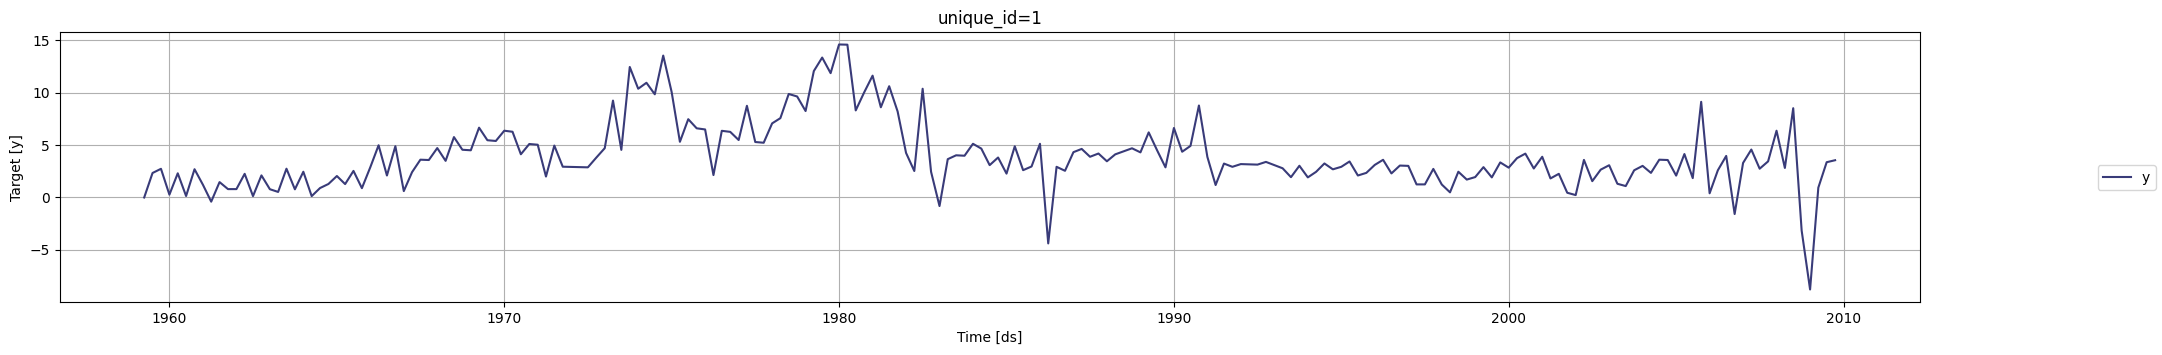

In [74]:
StatsForecast.plot(df)

In [75]:
train_data=df.iloc[:-1]
test_data=df.iloc[-1:]
models=[]

In [76]:
from statsforecast.models import SimpleExponentialSmoothing, SimpleExponentialSmoothingOptimized, Holt, HoltWinters, DynamicOptimizedTheta
models.append(SimpleExponentialSmoothingOptimized(alias = "SESOpt"))
#Holt's Model or Double Exponential Smoothing
models.append(Holt(alias = "Holt"))
#Holt-Winter's Model or Triple Exponential Smoothing
models.append(HoltWinters(season_length=12, alias = "HoltWinters"))
#Theta Model
models.append(DynamicOptimizedTheta(season_length=12, decomposition_type="additive", alias="Theta"))

In [77]:
models

[SESOpt, Holt, HoltWinters, Theta]

In [78]:
sf = StatsForecast(df=train_data,
                   models=models,
                   freq='Q', # monthly frequency
                   n_jobs=-1)

In [79]:
#Fit the model
sf.fit()

StatsForecast(models=[SESOpt,Holt,HoltWinters,Theta])

In [80]:
#Forecast
Y_hat = sf.forecast(h=1, fitted=True)
Y_hat=Y_hat.reset_index()
#Y_hat=Y_hat.style.format("{:.2f}")
Y_hat.head()

,unique_id,ds,SESOpt,Holt,HoltWinters,Theta
0,1,2009-09-30,0.755081,0.749155,1.18523,0.754812


In [81]:
#See fitted values from the models
values=sf.forecast_fitted_values()
values.head()

,ds,y,SESOpt,Holt,HoltWinters,Theta
unique_id,,,,,,
1,1959-03-31,0.00,NaN,1.232239,0.852943,0.000000
1,1959-06-30,2.34,0.000000,0.776005,0.833327,0.000000
1,1959-09-30,2.74,0.868776,1.350426,1.302898,0.863979
1,1959-12-31,0.27,1.563509,1.860707,2.066365,1.556648
1,1960-03-31,2.31,1.083265,1.272502,1.240595,1.081589


In [84]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [90]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
import pandas as pd

# Assuming test_data and Y_hat are already defined
actual_ts = test_data["y"]

# Create a list with the model aliases
model_names = [str(model) for model in models]

# Initialize error dataframe
error_df = pd.DataFrame(columns=model_names, index=["MAE", "MAPE", "MSE", "RMSE"])

# Calculate and print the errors for each model
for model in model_names:
    # Evaluate the model MAE
    model_mae = np.round(mean_absolute_error(actual_ts, Y_hat[model]), 2)

    # Evaluate the model MAPE
    model_mape = np.round(100 * mean_absolute_percentage_error(actual_ts, Y_hat[model]), 2)

    # Evaluate the model MSE
    model_mse = np.round(mean_squared_error(actual_ts, Y_hat[model]), 2)

    # Evaluate the model RMSE
    model_rmse = np.round(np.sqrt(model_mse), 2)

    # Save errors in error dataframe
    error_df.loc[:, model] = (model_mae, model_mape, model_mse, model_rmse)

# Create a new column indicating the best model for each evaluation metric
#error_df['Best model'] = error_df.idxmin(axis=1)

error_df



,SESOpt,Holt,HoltWinters,Theta
MAE,2.8,2.81,2.37,2.81
MAPE,78.79,78.96,66.71,78.8
MSE,7.87,7.9,5.64,7.87
RMSE,2.81,2.81,2.37,2.81


In [91]:
#Create a new column saying which method performed the best, for each evaluation metric
#error_df['Best model'] = error_df.idxmin(axis=1)

In [92]:
#Show the error dataframe on the console
error_df

,SESOpt,Holt,HoltWinters,Theta
MAE,2.8,2.81,2.37,2.81
MAPE,78.79,78.96,66.71,78.8
MSE,7.87,7.9,5.64,7.87
RMSE,2.81,2.81,2.37,2.81


# Which of the 4 methods in this section has the lowest test MAPE? Is the same method having the lowest test MAE as well?

Yes, Holt Winters is the best model and it has lowest MAE as well